In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/Users/luis/Desktop/neovantas/Exam_music_streaming_app.csv',sep=';')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.dtypes # there are some corrupted data in column "Proportion_popular_songs"

In [ ]:
df['Proportion_popular_songs'] = pd.to_numeric(df.Proportion_popular_songs,errors='coerce')
df = df.dropna()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# correlation matrix in a nice visualization
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))
plt.title('Pearson correlation between variables')
# Draw the heatmap using seaborn
sns.heatmap(df.drop('User_id',axis=1).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="seismic", linecolor='black', annot=True)
plt.show()

In [ ]:
#'Music_genres_per_day' and 'Songs_per_day' are extremely correlated, It's convenient to drop
# one of them

In [ ]:
df = df.drop('Music_genres_per_day',axis=1)

In [ ]:
plt.figure(figsize=(4,3.6))
plt.scatter(df["Proportion_working_time"],df["Searches_per_day"],c=df["Premium_upgrade"],s=70,alpha=1.0,cmap= "seismic")
plt.xlabel('Proportion of hours using app')
plt.ylabel('Searches per day')
plt.title('Premium upgrade vs (Searches per day, Proportion of hours using app)')
plt.show()

In [ ]:
df[df.Premium_upgrade == 1].Proportion_working_time.mean()

In [13]:
df[df.Premium_upgrade == 0].Proportion_working_time.mean()

0.10379954939463612

In [14]:
#Create a new categorical variable that groups the clients by the level of use of the app

In [15]:
df.head()

,User_id,Active_days,Songs_per_day,Numer_devices,Proportion_working_time,Searches_per_day,Proportion_popular_songs,NORTHAMERICA,EU,ASIA,Premium_upgrade
0,1,267,28,5,0.000000,0,0.028075,1,0,0,0
1,2,242,30,2,0.000000,0,0.024687,1,0,0,0
2,3,265,27,3,0.567737,8,0.015515,1,0,0,1
3,4,88,10,1,0.000000,2,0.017256,0,0,1,0
4,5,225,62,3,0.000000,20,0.000566,0,0,1,1


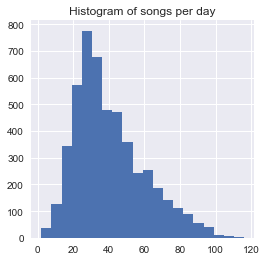

In [16]:
plt.figure(figsize=(4,4))
plt.hist(df.Songs_per_day,bins=20)
plt.title('Histogram of songs per day')

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(df.Active_days,bins=20)
plt.title('Histogram Active_days')

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(df.Proportion_working_time,bins=10)
plt.title('Histogram Proportion_working_time')

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(df.Searches_per_day,bins=20)
plt.title('Histogram of Searches_per_day')

In [ ]:
def categorize_use(searches_per_day,working_time):
    if searches_per_day > df.Searches_per_day.mean() + 0.5*df.Searches_per_day.std() and working_time > df.Proportion_working_time.mean()+0.5*df.Proportion_working_time.std(): 
        return "high"
    if searches_per_day < df.Searches_per_day.mean() - 0.5*df.Searches_per_day.std() and working_time < df.Proportion_working_time.mean()-0.5*df.Proportion_working_time.std():
        return "low"
    else:
        return "medium"

In [ ]:
import numpy as np

In [ ]:
df['level_of_use'] = np.vectorize(categorize_use)(df['Searches_per_day'], df['Proportion_working_time'])

In [ ]:
df.level_of_use.value_counts()

In [ ]:
df.groupby('level_of_use').Searches_per_day.mean()

In [ ]:
df.groupby('level_of_use').Proportion_working_time.mean()

In [ ]:
df.groupby('level_of_use').Songs_per_day.mean()

# PCA

In [ ]:
X = df.drop(['User_id','level_of_use','Premium_upgrade'],axis=1)

In [ ]:
mean_vec = np.mean(X, axis=0)
cov_mat = np.cov(X.T)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [ ]:
# create a list of tuples of the type (eigenvalue,eigenvector)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs.T[i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda x: x[0], reverse =True)
print('Eigenvalues in descending order:')
for pair in eig_pairs:
    print(pair[0])

In [ ]:
total_vals = sum(eig_vals)

individual_contribution= []
for pair in eig_pairs:
    pepe = 100*(pair[0]/total_vals)
    individual_contribution.append(pepe)
    
cumulative_contribution = []
for i in range(len(eig_pairs)):
    pepe = sum(individual_contribution[:i+1])
    cumulative_contribution.append(pepe)

In [ ]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(4, 4))
plt.bar(range(len(cumulative_contribution)), individual_contribution, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cumulative_contribution)), cumulative_contribution, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
cumulative_contribution

In [ ]:
X.shape

In [ ]:
y = df['Premium_upgrade'].values

In [ ]:
y.shape

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
from sklearn.decomposition import PCA
# first 2 PCA`s explain 99% of variance
pca = PCA(n_components=2)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 42)

In [ ]:
X_train.shape

In [ ]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
X_train.shape # has been reduced to 2 PCA's 
X_test.shape

In [ ]:
df_pca = pd.DataFrame(X_test)

In [ ]:
df_pca['Premium_upgrade'] = y_test

In [ ]:
df_pca.head()

In [ ]:
# correlation matrix in a nice visualization
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Pearson correlation between PCAs and Premium_upgrade')
# Draw the heatmap using seaborn
sns.heatmap(df_pca.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="seismic", linecolor='black', annot=True)
plt.show()

In [ ]:
# Logistic Regression based on PCA

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

In [ ]:
clf_lr = LogisticRegression() 
clf_lr.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
precision_score(clf_lr.predict(X_test),y_test)

In [ ]:
recall_score(clf_lr.predict(X_test),y_test)

In [ ]:
accuracy_score(clf_lr.predict(X_test),y_test)

In [ ]:
dmat = confusion_matrix(clf_lr.predict(X_test),y_test)

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,5))
dfmat = pd.DataFrame(dmat,index = ["Bad","Good"],
                  columns = ["Bad","Good"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Logistic Regression Classifier based on PCA')
plt.show()

In [ ]:
# we check the performance of the algorithm using the area below the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

clf_lr.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_lr.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression based on PCA')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Ensemble method based on PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()

In [ ]:
from scipy import stats

In [ ]:
mat = []
estimators=[('knn', clf1), ('svm', clf2), ('dt', clf3)]
for estimator in estimators:
    estimator[1].fit(X_train,y_train)
for i in range(len(estimators)):
    temp = []
    for j in range(len(estimators)):
        temp.append(stats.spearmanr(estimators[i][1].predict(X_test),estimators[j][1].predict(X_test)).correlation)
    mat.append(temp)

In [ ]:
mat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.heatmap(mat)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
clf_combination = VotingClassifier(estimators = estimators,voting='hard')

In [ ]:
clf_combination.fit(X_train,y_train)

In [ ]:
accuracy_score(clf_combination.predict(X_test),y_test)

In [ ]:
precision_score(clf_combination.predict(X_test),y_test)

In [ ]:
recall_score(clf_combination.predict(X_test),y_test)

In [ ]:
confusion_matrix(clf_combination.predict(X_test),y_test)

Classifier methods based on PCA's do not work very well!

# LOGISTIC REGRESSION CLASSIFIER

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 42)

In [ ]:
clf_lr = LogisticRegression() 
clf_lr.fit(X_train,y_train)

In [ ]:
accuracy_score(clf_lr.predict(X_test),y_test)

In [ ]:
precision_score(clf_lr.predict(X_test),y_test)

In [ ]:
recall_score(clf_lr.predict(X_test),y_test)

In [ ]:
print('accuracy score = '+str(accuracy_score(clf_lr.predict(X_test),y_test)))
print('precision score = '+str(precision_score(clf_lr.predict(X_test),y_test)))
print('recall score = '+str(recall_score(clf_lr.predict(X_test),y_test)))

In [ ]:
dmat = confusion_matrix(clf_lr.predict(X_test),y_test)

In [ ]:
dmat

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
dfmat = pd.DataFrame(dmat,index = ["Regular","Premium"],
                  columns = ["Regular","Premium"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Logistic Regression Classifier')
plt.show()

In [ ]:
# we check the performance of the algorithm using the area below the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

clf_lr.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_lr.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# ENSEMBLE METHOD (VOTING CLASSIFIER)

In [ ]:
clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()

In [ ]:
mat = []
estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)]
for estimator in estimators:
    estimator[1].fit(X_train,y_train)
for i in range(len(estimators)):
    temp = []
    for j in range(len(estimators)):
        temp.append(stats.spearmanr(estimators[i][1].predict(X_test),estimators[j][1].predict(X_test)).correlation)
    mat.append(temp)

In [ ]:
mat

In [ ]:
sns.heatmap(mat)

In [ ]:
clf_combination = VotingClassifier(estimators = estimators,voting='hard')

In [ ]:
clf_combination.fit(X_train,y_train)

In [ ]:
accuracy_score(clf_combination.predict(X_test),y_test)

In [ ]:
precision_score(clf_combination.predict(X_test),y_test)

In [ ]:
recall_score(clf_combination.predict(X_test),y_test)

In [ ]:
cv_ensemble = np.mean(cross_val_score(clf_combination,X_test,y_test,cv=50))

In [ ]:
print('cross_val_score = '+str(cv_ensemble))

In [ ]:
print('accuracy score = '+str(accuracy_score(clf_combination.predict(X_test),y_test)))
print('precision score = '+str(precision_score(clf_combination.predict(X_test),y_test)))
print('recall score = '+str(recall_score(clf_combination.predict(X_test),y_test)))

In [ ]:
dmat = confusion_matrix(clf_combination.predict(X_test),y_test)

In [ ]:
dmat

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,5))
dfmat = pd.DataFrame(dmat,index = ["Regular","Premium"],
                  columns = ["Regular","Premium"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Voting Classifier')
plt.show()

In [ ]:
# XGBOOST 

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf_xgb = XGBClassifier()

In [ ]:
clf_xgb.fit(X_train,y_train)

In [ ]:
X_train.shape

In [ ]:
accuracy_score(clf_xgb.predict(X_test),y_test)

In [ ]:
precision_score(clf_xgb.predict(X_test),y_test)

In [ ]:
recall_score(clf_xgb.predict(X_test),y_test)

In [ ]:
print('accuracy score = '+str(accuracy_score(clf_xgb.predict(X_test),y_test)))
print('precision score = '+str(precision_score(clf_xgb.predict(X_test),y_test)))
print('recall score = '+str(recall_score(clf_xgb.predict(X_test),y_test)))

In [ ]:
confusion_matrix(clf_xgb.predict(X_test),y_test)

In [ ]:
cv_xgb = np.mean(cross_val_score(clf_xgb,X_test,y_test,cv=50))

In [ ]:
print('cross_val_score = '+str( cv_xgb ))

In [ ]:
dmat = confusion_matrix(clf_xgb.predict(X_test),y_test)

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
dfmat = pd.DataFrame(dmat,index = ["Regular","Premium"],
                  columns = ["Regular","Premium"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for xgboost Classifier')
plt.show()

In [ ]:
# we check the performance of the algorithm using the area below the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

clf_xgb.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_xgb.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGboost')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feat_imp = clf_xgb.feature_importances_.tolist()

In [ ]:
feats = X.columns.tolist()

In [ ]:
feature_importances = []
for i in range(len(feats)):
    importance = feat_imp[i]
    feature = feats[i]
    feature_importances.append((feature,importance))

In [ ]:
# sorting 
sorted_feature_importances = sorted(feature_importances, key=lambda x: -x[1])

In [ ]:
# putting the list in dataframe format
df_feature_importances = pd.DataFrame(sorted_feature_importances,columns=["feature","importance"])

In [ ]:
df_feature_importances = df_feature_importances.sort_values(by='importance',ascending=True)

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

features = tuple(df_feature_importances.feature.tolist())
y_pos = np.arange(len(features))
performance = np.array(df_feature_importances.importance)
error = np.random.rand(len(features))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, features)
plt.xlabel('importance')
plt.title('Feature importance')
 
plt.show()

In [ ]:
df_feature_importances.sort_values(by='importance',ascending=False)

# Selection of 500 target users

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 42)

In [ ]:
clf_lr.fit(X_train,y_train)

In [ ]:
clf_xgb.fit(X_train,y_train)

In [ ]:
clf_xgb.predict_proba(X)[:,0]

In [ ]:
xgboost_probabilities = clf_xgb.predict_proba(X)[:,0]

In [ ]:
df['xgboost_prob'] = pd.Series(xgboost_probabilities)

In [ ]:
df_500_xgb = df[df.Premium_upgrade ==0 ].sort_values(by='xgboost_prob',ascending=False)[:500]

In [ ]:
logit_probabilities = clf_lr.predict_proba(X)[:,0]

In [ ]:
df['logit_prob'] = pd.Series(logit_probabilities)

In [ ]:
df_500_lr = df[df.Premium_upgrade ==0 ].sort_values(by='logit_prob',ascending=False)[:500]

In [ ]:
lr_500 = df_500_lr['User_id'].tolist()

In [ ]:
xgb_500 = df_500_xgb['User_id'].tolist()

In [ ]:
len(list(set(xgb_500).intersection(lr_500)))

In [ ]:
X = df_500_xgb.drop(['User_id','level_of_use','Premium_upgrade','xgboost_prob'],axis=1)

In [ ]:
premium = df[df.Premium_upgrade == 1].drop(['xgboost_prob','logit_prob','level_of_use','Premium_upgrade','User_id'],axis=1).mean().to_frame()

In [ ]:
premium.rename(columns={0: 'average'})

In [ ]:
candidates = X.mean().to_frame()

In [ ]:
candidates.rename(columns={0: 'average'})